In [116]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import lhsmdu
import time
from pyDOE import *
import random

from PIL import Image, ImageDraw

In [5]:
def xy_rand():
    x = 3*np.random.random_sample()-2       # X domain is [-2,1]
    y = 2*np.random.random_sample()-1       # Y domain is [-1,1]
    return x,y 

4
0
1
2
3
[[-1.625  0.     0.     0.   ]
 [ 0.    -0.125  0.     0.   ]
 [ 0.     0.    -1.625  0.   ]
 [ 0.     0.     0.    -0.125]]


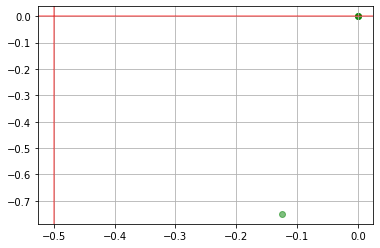

In [6]:
xrange = [-2,1]
yrange = [-1,1]

def xy_orth(samples, dimensions = 2, strength = 1):
    samples = samples
    dimensions = dimensions
    strength = strength
    MAJOR = int(samples**(1/strength))
    print(MAJOR)
    xlist = np.zeros([int(MAJOR), int(MAJOR)])
    ylist = np.zeros([int(MAJOR), int(MAJOR)])
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
    MAJOR = int(MAJOR/4)
    for subsquare in range(4):
        if subsquare%2 == 0:
            xrangenow = [xrange[0], xrange[0]+0.5*xdif]
        else:
            xrangenow = [xrange[0]+0.5*xdif, xrange[1]]
        if subsquare < 2:
            yrangenow = [yrange[0], yrange[0]+0.5*ydif]
        else:
            yrangenow = [yrange[0]+0.5*ydif, yrange[1]]
        xdifnow = xdif/2
        ydifnow = ydif/2
            

    #     init_genrand(3737);
        m = 0
        n = 0
            ## Divide the entire area into MAJOR * MAJOR sub-squares */
            ## Divide each subsquare into MAJOR * MAJOR cells */
            ## The first index determines the row/column number of the subsquare */
            ### So xlist[2][5] would indicate what minor column contains the sample
            ###   in the major cell with major column number 2 and major row number 5
            ###  ylist[2][5] will provide its minor row number */
       
        for i in range(MAJOR):
            i = i + subsquare*MAJOR
            print(i)
            m = xrangenow[0] + (0.5/samples)*xdif
            n = yrangenow[0] + (0.5/samples)*ydif
            for j in range(MAJOR):
                j = j + subsquare*MAJOR
                xlist[i][j] = m #+ np.random.random_sample()*xdif*(1/(2*MAJOR))
                ylist[i][j] = n #+ np.random.random_sample()*ydif*(1/(2*MAJOR))
                n += (1/samples)*ydif
                m += (1/samples)*xdif
    
    #     print(xlist)
    for k in range(samples):
        for i in range(MAJOR):
            i = i + subsquare*MAJOR
            ##              /* Due to the way the lists have been created subranges with similar
            ##              x or y values will stay together
            ##              xlist[i] is a pointer to the start of the 1D array xlist[i][0] ... xlist[i][MAJOR - 1]
            xlist[i] = np.random.permutation(xlist[i])
            ylist[i] = np.random.permutation(ylist[i])
    #         for i in range (MAJOR):          ##     /* Subsquare column */

    #             for j in range(MAJOR):       ##  /* Subsquare row */

    #                     ##    /* For a given subsquare column (i) every subsquare has its sample in
    #                     ##     a different column of cells (as determined by xlist[i][j]
    #                     ##    The random long double value selects a random point in the minor subsquare
    #                 x = -2.0 + scale * (xlist[i][j] + np.random.random_sample())

    #                     ##    /* For a given subsquare row, every subsquare has its sample in a different 
    #                     ##   row of cells */
    #                 y = -2.0 + scale * (ylist[j][i] + np.random.random_sample());

    #                     ##    /* Do the desired computation with with x and y at this point in the code */
    print(xlist)
#     print(ylist)
    return xlist,ylist

x_orth, y_orth = xy_orth(4)
# plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
plt.scatter(x_orth[1], y_orth[1], color="g", label="Orthogonal", alpha = 0.5)
# plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

# plt.legend()
plt.grid()
plt.show()

20


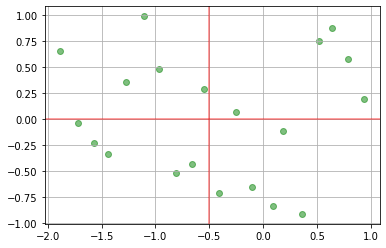

In [30]:
def xy_orth(samples, dimensions = 2, strength = 1):
    xrange = [-2,1]
    yrange = [-1,1]
    samples = samples
    dimensions = dimensions
    strength = strength
    MAJOR = int(samples**(1/strength))
    print(MAJOR)
    xlist = np.zeros([int(MAJOR), int(MAJOR)])
    ylist = np.zeros([int(MAJOR), int(MAJOR)])
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
            

    #     init_genrand(3737);
    m = 0
    n = 0
        ## Divide the entire area into MAJOR * MAJOR sub-squares */
        ## Divide each subsquare into MAJOR * MAJOR cells */
        ## The first index determines the row/column number of the subsquare */
        ### So xlist[2][5] would indicate what minor column contains the sample
        ###   in the major cell with major column number 2 and major row number 5
        ###  ylist[2][5] will provide its minor row number */

    for i in range(MAJOR):
        m = xrange[0] + (0.5/samples)*xdif
        n = yrange[0] + (0.5/samples)*ydif
        for j in range(MAJOR):
            xlist[i][j] = m + np.random.random_sample()*xdif*(1/(2*MAJOR))
            ylist[i][j] = n + np.random.random_sample()*ydif*(1/(2*MAJOR))
            n += (1/samples)*ydif
            m += (1/samples)*xdif

#     print(xlist)
    for k in range(samples):
        for i in range(MAJOR):
            ##              /* Due to the way the lists have been created subranges with similar
            ##              x or y values will stay together
            ##              xlist[i] is a pointer to the start of the 1D array xlist[i][0] ... xlist[i][MAJOR - 1]
            xlist[i] = np.random.permutation(xlist[i])
            ylist[i] = np.random.permutation(ylist[i])
    #         for i in range (MAJOR):          ##     /* Subsquare column */

    #             for j in range(MAJOR):       ##  /* Subsquare row */

    #                     ##    /* For a given subsquare column (i) every subsquare has its sample in
    #                     ##     a different column of cells (as determined by xlist[i][j]
    #                     ##    The random long double value selects a random point in the minor subsquare
    #                 x = -2.0 + scale * (xlist[i][j] + np.random.random_sample())

    #                     ##    /* For a given subsquare row, every subsquare has its sample in a different 
    #                     ##   row of cells */
    #                 y = -2.0 + scale * (ylist[j][i] + np.random.random_sample());

    #                     ##    /* Do the desired computation with with x and y at this point in the code */
#     print(xlist)
#     print(ylist)
    return xlist,ylist

x_orth, y_orth = xy_orth(20)
# plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
plt.scatter(x_orth[0], y_orth[0], color="g", label="Orthogonal", alpha = 0.5)
# plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

# plt.legend()
plt.grid()
plt.show()

In [57]:
def xy_LHS(x):
    l = lhsmdu.sample(2,x)
    x,y = (l[0][0]), (l[1][0])
    x = x.tolist()
    x = x[0]
    for xind in range(len(x)):
        x[xind] = 3*x[xind]-2
    y = y.tolist()
    y = y[0]
    for yind in range(len(y)):
        y[yind] = 2*y[yind]-1
    return x,y

In [2]:
def another_Orthogonal(ns):
   assert(np.sqrt(ns) % 1 == 0),"Please insert an even number of samples"
   n = int(np.sqrt(ns))
   # Making a datastructure of a dict with coordinate tuples of a bigger grid with subcoordinate of sub-grid points
   blocks = {(i,j):[(a,b) for a in range(n) for b in range(n)] for i in range(n) for j in range(n)}
   points = []#np.empty((n,2))
   append = points.append # tips of python to fasten up append call
   for block in blocks:
       point = random.choice(blocks[block])
       lst_row = [(k1, b) for (k1, b), v in blocks.items() if k1 == block[0]]
       lst_col = [(a, k1) for (a, k1), v in blocks.items() if k1 == block[1]]

       for col in lst_col:
           blocks[col] = [a for a in blocks[col] if a[1] != point[1]]

       for row in lst_row:
           blocks[row] = [a for a in blocks[row] if a[0] != point[0]]
      #Adjust the points to fit the grid they fall in  
      point = (point[0] + n * block[0], point[1] + n * block[1])
      append(point)

    return points

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [33]:
def amount_iter(compl, max_steps, threshold_inf: int = 10):
    c = compl
    z = 0
    i = 0
    while (z*z.conjugate()).real < threshold_inf and i < max_steps:
        z = z**2 + c
        i += 1
    return i

In [102]:
def xy_LHS_another2(samples):
    l = lhs(2,samples = samples)
    x = []
    y = []
    for i in range(len(l)):
        x.append(3*l[i][0]-2)
        y.append(2*l[i][1]-1)
    return x,y


In [103]:
def xy_LHS_another(samples, dimensions = 2, strength = 1):
    xrange = [-2,1]
    yrange = [-1,1]
    samples = samples
    dimensions = dimensions
    strength = strength
    MAJOR = int(samples**(1/strength))
    xlist = np.zeros([int(MAJOR)])
    ylist = np.zeros([int(MAJOR)])
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
    m = xrange[0] + (0.5/samples)*xdif
    n = yrange[0] + (0.5/samples)*ydif
    for j in range(MAJOR):
        xlist[j] = m + np.random.random_sample()*xdif*(1/(2*MAJOR))
        ylist[j] = n + np.random.random_sample()*ydif*(1/(2*MAJOR))
        n += (1/samples)*ydif
        m += (1/samples)*xdif
    for k in range(samples):
        xlist = np.random.permutation(xlist)
        ylist = np.random.permutation(ylist)
    return xlist,ylist

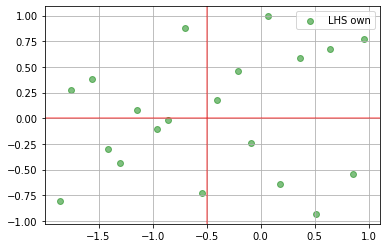

In [153]:
x_LHS,y_LHS = xy_LHS(20)
x_LHS_another, y_LSH_another = xy_LHS_another(20)
x_LHS_another2, y_LSH_another2 = xy_LHS_another2(20)

# plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
plt.scatter(x_LHS_another, y_LSH_another, color="g", label="LHS own", alpha = 0.5)
# plt.scatter(x_LHS_another2, y_LSH_another2, color="r", label="LHS with lhs()", alpha = 0.5)
# plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

plt.legend()
plt.grid()
plt.show()

## Orthogonal

In [175]:
def another_Orthogonal(ns):
    xrange = [-2,1]
    yrange = [-1,1]
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
    assert(np.sqrt(ns) % 1 == 0),"Please insert an even number of samples"
    n = int(np.sqrt(ns))
    # Making a datastructure of a dict with coordinate tuples of a bigger grid with subcoordinate of sub-grid points
    blocks = {(i,j):[(a,b) for a in range(n) for b in range(n)] for i in range(n) for j in range(n)}
    points = []#np.empty((n,2))
    append = points.append # tips of python to fasten up append call
    for block in blocks:
        point = random.choice(blocks[block])
        lst_row = [(k1, b) for (k1, b), v in blocks.items() if k1 == block[0]]
        lst_col = [(a, k1) for (a, k1), v in blocks.items() if k1 == block[1]]

        for col in lst_col:
            blocks[col] = [a for a in blocks[col] if a[1] != point[1]]

        for row in lst_row:
            blocks[row] = [a for a in blocks[row] if a[0] != point[0]]
        #Adjust the points to fit the grid they fall in  
        point = (point[0] + n * block[0], point[1] + n * block[1])
        append(point)
    x = []
    y = []
    for i in range(len(points)):
        x.append(3*points[i][0]/ns-2 + np.random.random_sample()*xdif/(2*ns))
        y.append(2*points[i][1]/ns-1 + np.random.random_sample()*ydif/(2*ns))
#           x.append(points[i][0]/ns)
#           y.append(points[i][1]/ns)

    return x,y

In [196]:
x, y = another_Orthogonal(1000)

plt.scatter(x,y)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)
plt.show()

AssertionError: Please insert an even number of samples